# Regression Homework

This is the first assignment for CAP 4630 and we will develop two basic models with regression. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 90 Points)**


**Task Overview:**
- Singal Variable Nonlinear Regression
- Multiple Variable Linear Regression


## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.


In [1]:
# Requirements:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.

           X            Y
0  -0.812377   146.013887
1  -6.935876 -2050.854715
2   3.486073   561.936114
3   0.563652    54.220542
4   5.511145  2207.389506
..       ...          ...
95 -5.758898  -468.241012
96 -0.927995   368.884052
97 -5.536775  -978.079550
98 -2.210791  1390.267279
99  5.051275  2853.676231

[100 rows x 2 columns]


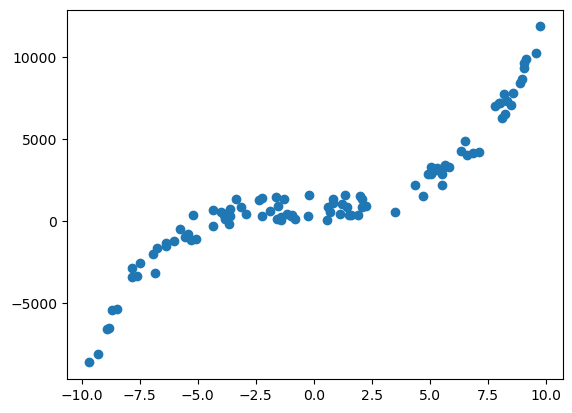

In [2]:
# Read the table in with pandas library.
df = pd.read_csv("data_nonlinear.csv")

# Showcase the entire dataframe read.
print(df)

# Convert pandas dataframe to numpy.
table = df.to_numpy()

# Get the X axis.
x = table[:, 0]

# Get the Y axis.
y = table[:, 1]

# Plot x against y.
plt.scatter(x, y)

# Reshape data appropriately.
x_reshape = x.reshape(100, 1)
y_reshape = y.reshape(100, 1)

## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(25 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544



### 1. Establish a relationship between Y and X with a cubic function:

numpy fitted model:
        3         2
10.75 x + 6.346 x - 0.1348 x + 843.8 



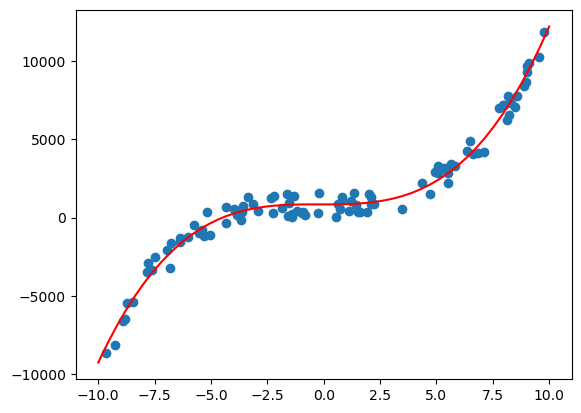

In [3]:
# Train a model based on the data.
model = np.poly1d(np.polyfit(x, y, 3))
print("numpy fitted model:\n", model, "\n")

# Return evenly spaced numbers from -10 to 10.
polyline = np.linspace(-10, 10)

# Plot the cubic model and the data.
plt.scatter(x, y)
plt.plot(polyline, model(polyline), color='red')

### 2. Compute MSE loss with observation-prediction pairs.

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Linear regression object.
lm = LinearRegression()

# Select only x1 to train the model.
x1 = table[:, 0:1]

# Fit the model on x1 and x2.
sk_model = lm.fit(x1, y)

# Predict y values using x1.
y_pred = lm.predict(x1)
mse = mean_squared_error(y, y_pred)

print(f'MSE: {mse}')

MSE: 2492616.8925624173


### 3. Implement Gradient Descent (GD) to achieve optimal solution with the learning rate of 0.000001 (1e-6) and 10000 (1e4) epochs.

In [5]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Building the model
a = 0
b = 0
c = 0
d = 0

L = 0.000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = a*x*x*x + b*x*x + c*x + d  # The current predicted value of Y
    
    # Find the derivatives.
    D_a = (-2/n) * sum(x * x * x * (y - y_pred))
    D_b = (-2/n) * sum(x * x * (y - y_pred))
    D_c = (-2/n) * sum(x * (y - y_pred))
    D_d = (-2/n) * sum(y - y_pred)
    
    # Update the model values.
    a = a - L * D_a
    b = b - L * D_b
    c = c - L * D_c
    d = d - L * D_d
    
    if i < 5:
        print(f'Epoch {i} :', a, b, c, d)

Epoch 0 : 2.8045093168662314 0.15006631239563697 0.040479034340047314 0.0030023401200892003
Epoch 1 : 4.905935374329749 0.2803623842843468 0.0706828002618112 0.005756528222849299
Epoch 2 : 6.480417434500056 0.395779237410925 0.09318576969022646 0.008323648642107887
Epoch 3 : 7.65996806232127 0.49998280146312246 0.10991745268097951 0.010749486523089886
Epoch 4 : 8.543527816733905 0.5957208253596222 0.12232397430880632 0.013068360586717542


## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

variables:
a: 10.655168698725843	b: 20.970276527941813	c: -1.8103041714197257	d: 7.9893336076278585
model:
10.655168698725843 x^3 + 20.970276527941813 x^2 + -1.8103041714197257 x + 7.9893336076278585
numpy fitted model:
        3         2
10.75 x + 6.346 x - 0.1348 x + 843.8 



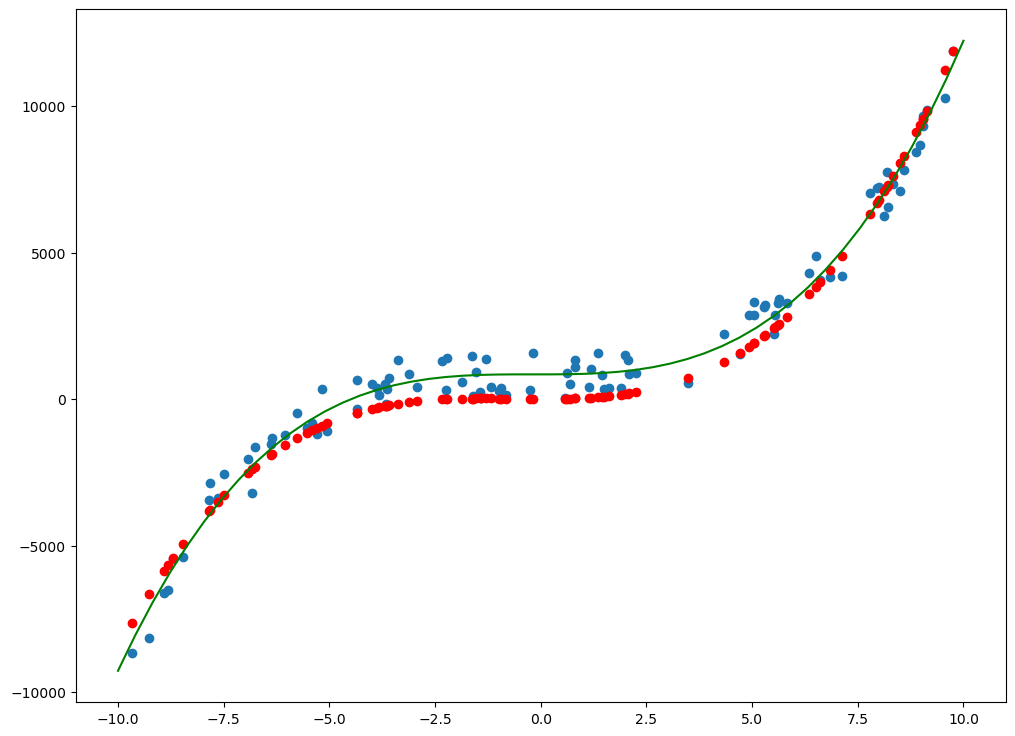

In [8]:
# Making predictions based on the x values.
y_pred = a*x*x*x + b*x*x + c*x + d

# Model values.
print(f'variables:\na: {a}\tb: {b}\tc: {c}\td: {d}')
print(f'model:\n{a} x^3 + {b} x^2 + {c} x + {d}')

# Train a model based on the data.
model = np.poly1d(np.polyfit(x, y, 3))
print("numpy fitted model:\n", model, "\n")

# Return evenly spaced numbers from -10 to 10.
polyline = np.linspace(-10, 10)

# Real observations plotted against x values.
plt.scatter(x, y)

# Model predictions plotted against x values.
plt.scatter(x, y_pred, color='red')

# Model prediction with the numpy fitted line.
plt.plot(polyline, model(polyline), color='green')
plt.show()

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


In [9]:
# This allows you to create a 3D plot in a jupyter notebook.
%matplotlib notebook

          X1         X2           Y
0   9.624635   8.521227  760.342549
1   7.246414   1.453848  334.062641
2   7.682933  10.874100  783.724738
3   2.363142   4.544764  401.073157
4   5.788609  13.591267  901.487267
..       ...        ...         ...
95  3.509973  14.437170  600.682865
96  2.916080   2.819321  257.565599
97  0.089975  12.785568  691.834017
98  5.208469   7.765647  726.299832
99  4.428768   2.871729  316.814913

[100 rows x 3 columns]


<IPython.core.display.Javascript object>


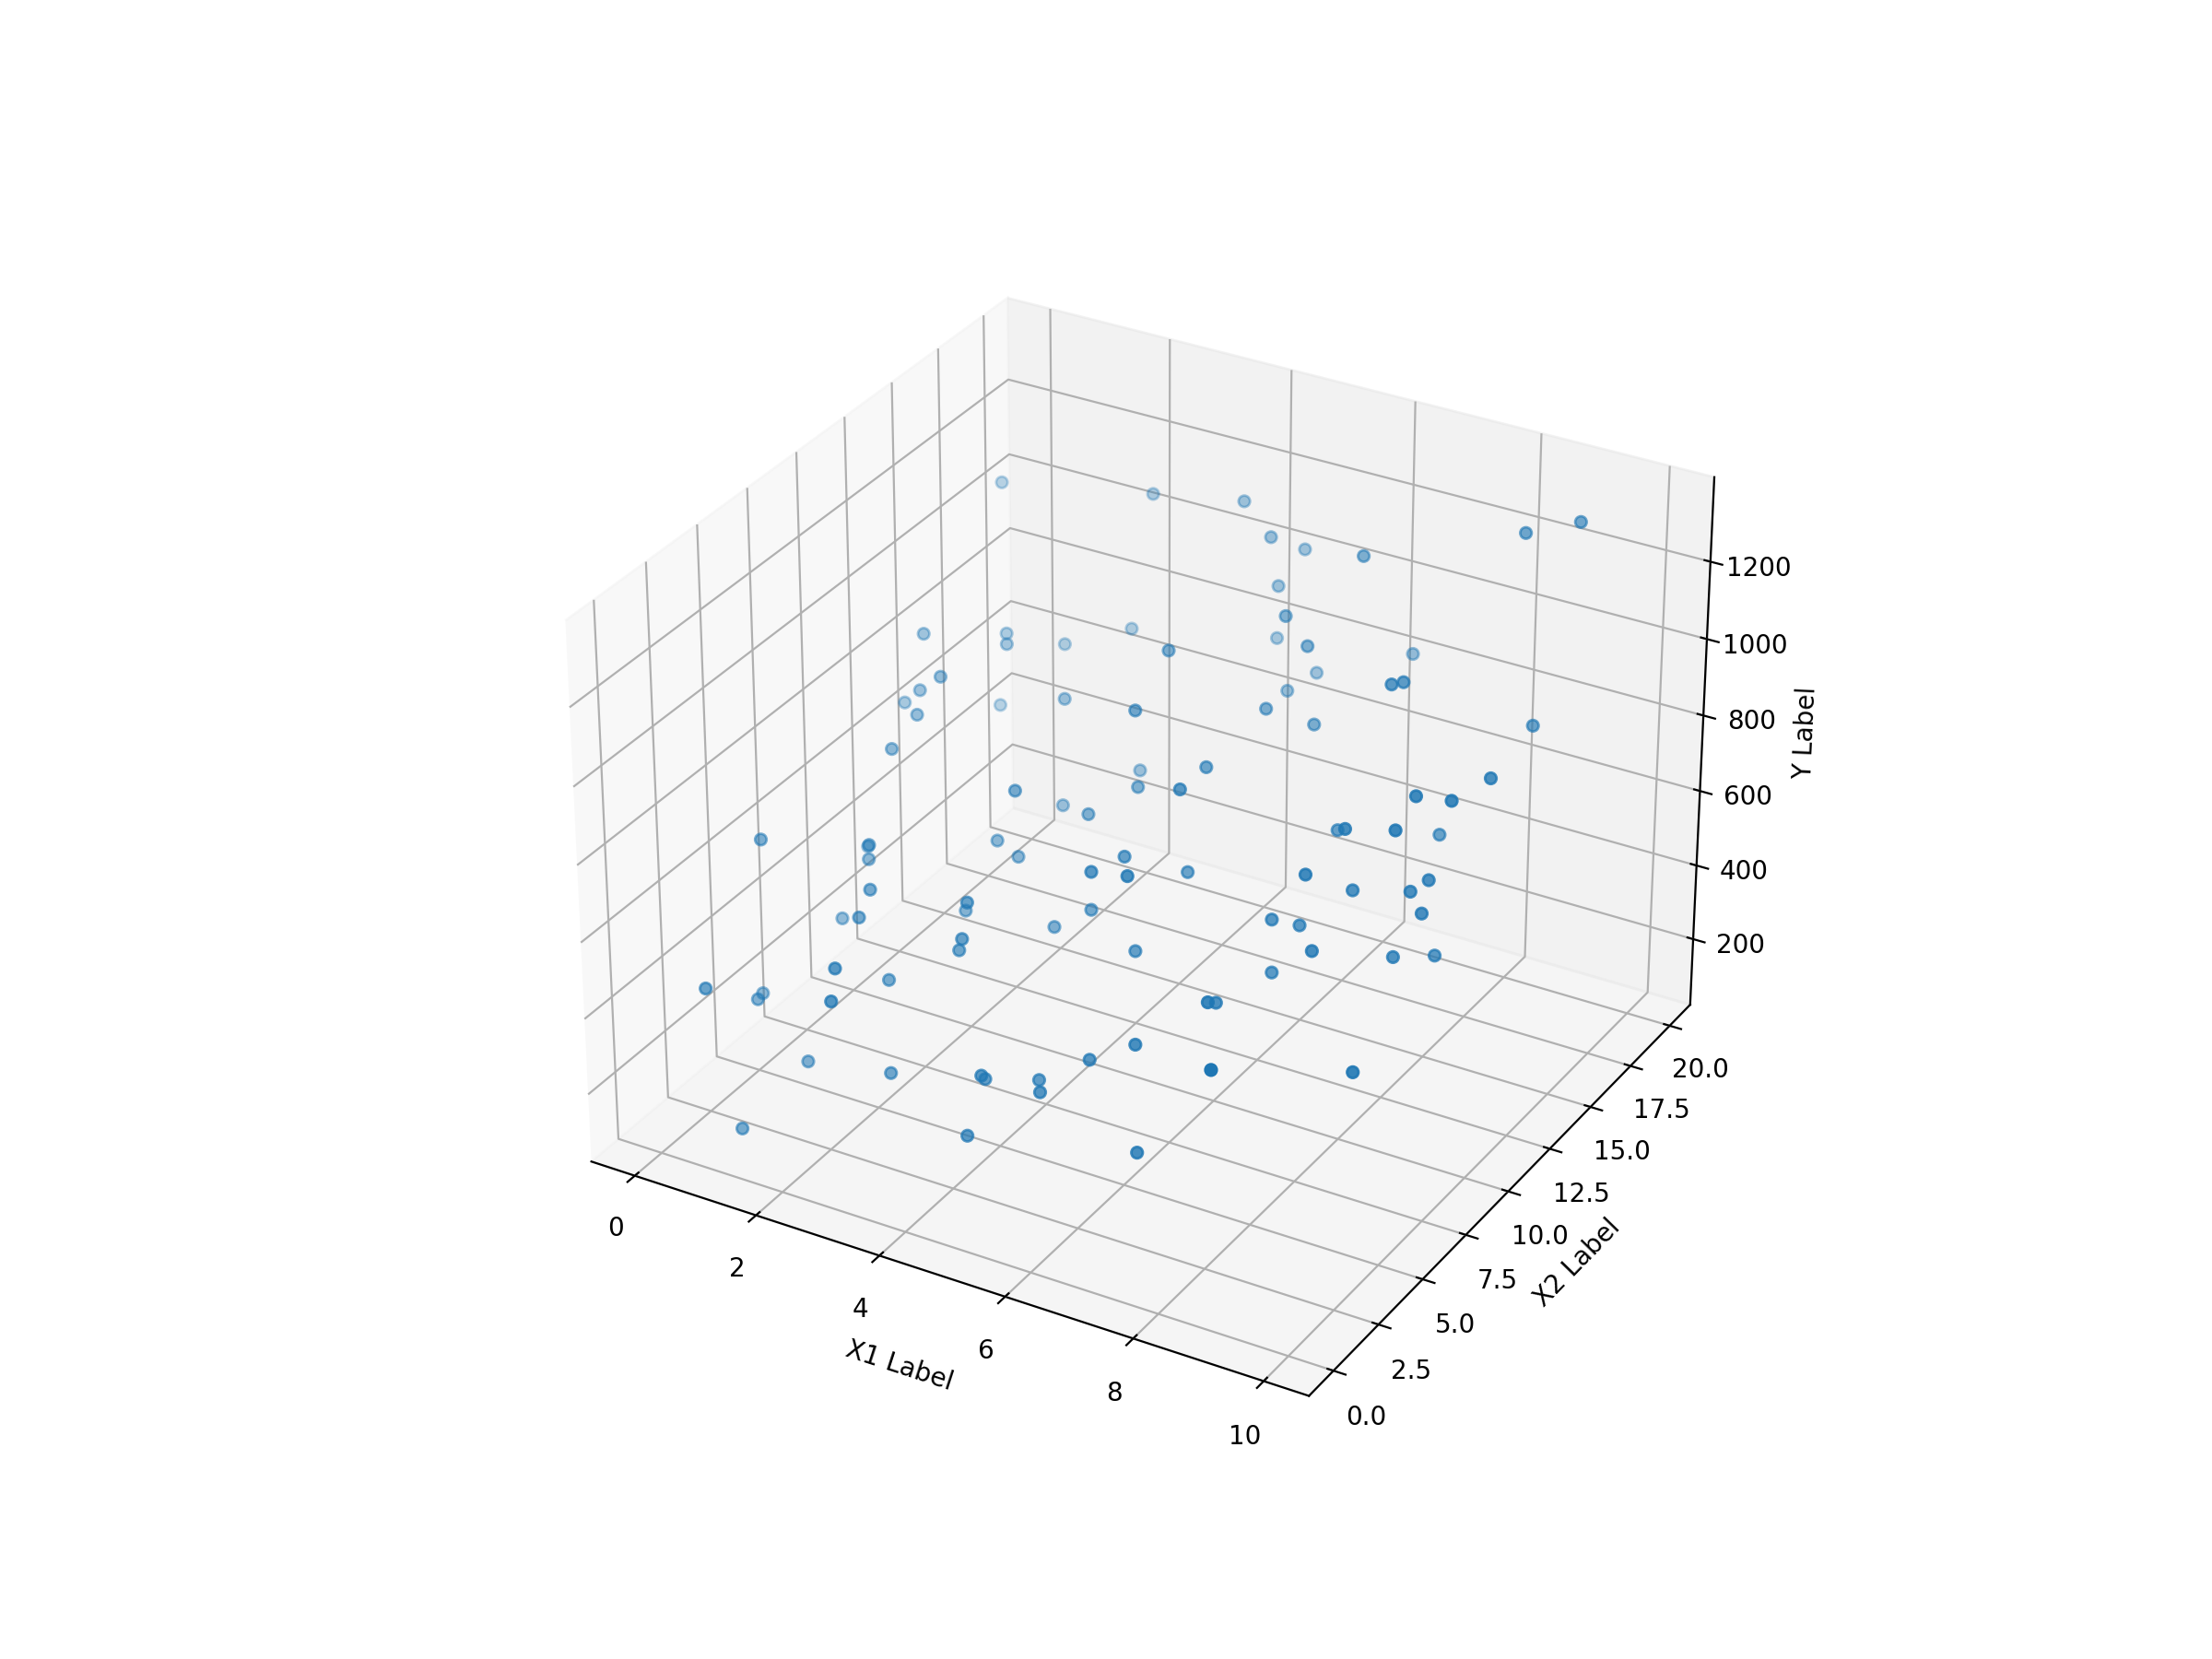

Text(0.5, 0, 'Y Label')

In [30]:
# Read the table in with pandas library.
df = pd.read_csv("data_two_variables.csv")

# Showcase the entire dataframe read.
print(df[:])

# Convert pandas dataframe to numpy.
table = df.to_numpy()

# Get the X1 axis.
x1 = table[:, 0]

# Get the X2 axis.
x2 = table[:, 1]

# Get the Y axis.
y = table[:, 2]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')


## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(25 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

### 1. Establish a linear function to describe the relationship among Y, X1, and X2.

In [31]:
# Linear regression object.
lm = LinearRegression()

# Select only x1 and x2 to train.
multivar = table[:, 0:2]

# Fit the model on x1 and x2.
model = lm.fit(multivar, y)

print(f'Model Coefficients X1, X2:\n{model.coef_}\n')
print(f'Model y-intercept:\n{model.intercept_}\n')
print(f'Model:\n{model.coef_[0]} x1 + {model.coef_[0]} x2 + {model.intercept_}')

Model Coefficients X1, X2:
[31.77643185 34.11473428]

Model y-intercept:
234.83720343533383

Model:
31.776431848230505 x1 + 31.776431848230505 x2 + 234.83720343533383


### 2. Compute the MSE loss with observation prediction pairs

In [32]:
from sklearn.metrics import mean_squared_error

# Predict y values using x1 and x2.
y_pred_scikit = lm.predict(multivar)
mse = mean_squared_error(y, y_pred_scikit)

print(f'MSE: {mse}')

MSE: 20248.654717380334


### 3. Implement Gradient Descent (GD) to achieve optimal solution with the learning rate of 0.001 (1e-3) and 10000 (1e4) epochs.

In [37]:
# To make a multilinear regression function in the shape of Y = X1 + X2 + C
# We will need to train the model with different variables.
m1 = 0
m2 = 0
m3 = 0

L = 0.001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(x1)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    # The current predicted value of y.
    y_pred = m1*x1 + m2*x2 + m3
    
    # Get the derivatives of m1 and m2.
    D_m1 = (-2/n) * sum(x1 * (y - y_pred))
    D_m2 = (-2/n) * sum(x2 * (y - y_pred))
    D_m3 = (-2/n) * sum(y - y_pred)
    
    # Update coefficients.
    m1 = m1 - L * D_m1
    m2 = m2 - L * D_m2
    m3 = m3 - L * D_m3
    
    if i < 5:
        print(f'Epoch {i}: {m1} {m2} {m3}')

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514867
Epoch 3: 20.213137348549306 40.2953527521597 3.862205034306656
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634


### 4. Print out the optimal solution at final step.

grad descent model:
32.73494342264618 x1 + 34.69592128962032 x2 + 222.91661391579635
m1: 32.73494342264618	m2: 34.69592128962032	c: 222.91661391579635

scikit learn model:
31.776431848230505 x1 + 34.11473427595477 x2 + 234.83720343533383
m1: 31.776431848230505	m2: 34.11473427595477	c: 234.83720343533383



<IPython.core.display.Javascript object>


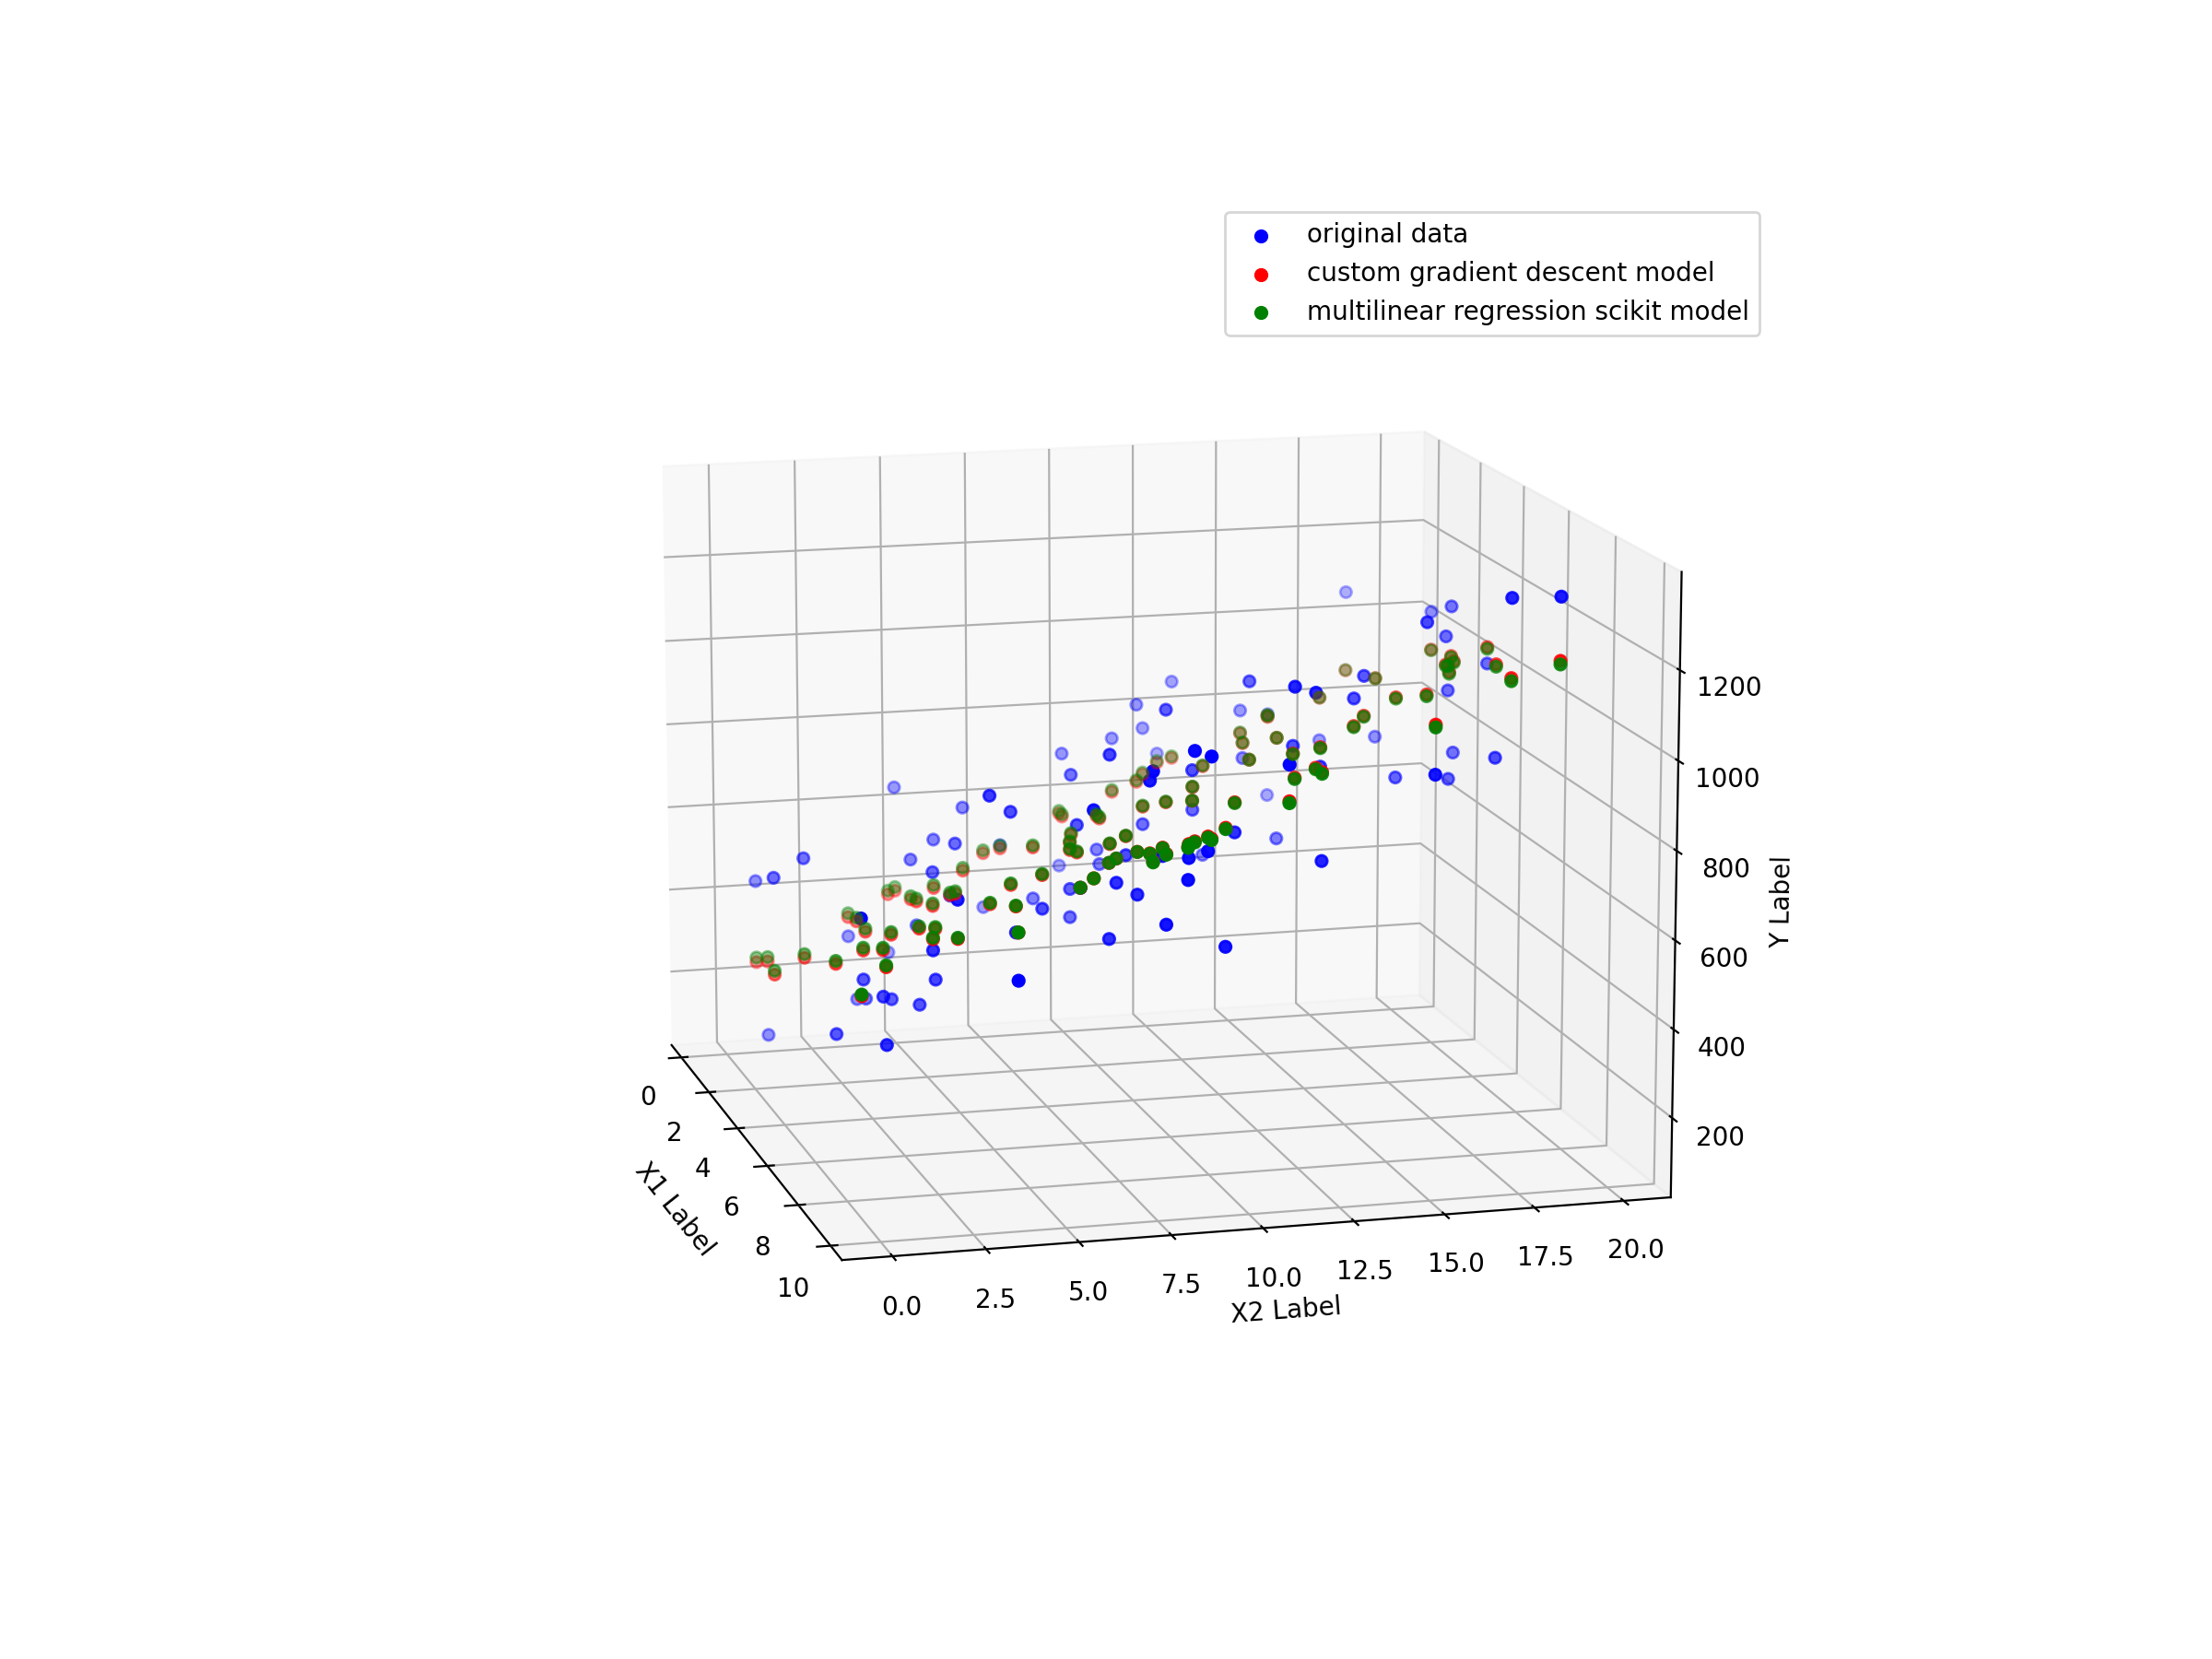

In [38]:
# Making predictions based on x1 and x2 values.
y_pred = m1 * x1 + m2 * x2 + m3

# Model values.
print(f'grad descent model:\n{m1} x1 + {m2} x2 + {m3}')
print(f'm1: {m1}\tm2: {m2}\tc: {m3}\n')

print(f'scikit learn model:\n{model.coef_[0]} x1 + {model.coef_[1]} x2 + {model.intercept_}')
print(f'm1: {model.coef_[0]}\tm2: {model.coef_[1]}\tc: {model.intercept_}\n')

# Plot the chart of x1 x2 overlayed with the numpy model, and the gradient descent model.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, label="original data", color="blue")
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
ax.scatter(x1, x2, y_pred, label="custom gradient descent model", color="red")
ax.scatter(x1, x2, y_pred_scikit, label="multilinear regression scikit model", color="green")
ax.legend()


## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)

grad descent model:
32.73494342264618 x1 + 34.69592128962032 x2 + 222.91661391579635
m1: 32.73494342264618	m2: 34.69592128962032	c: 222.91661391579635

scikit learn model:
31.776431848230505 x1 + 34.11473427595477 x2 + 234.83720343533383
m1: 31.776431848230505	m2: 34.11473427595477	c: 234.83720343533383



<IPython.core.display.Javascript object>


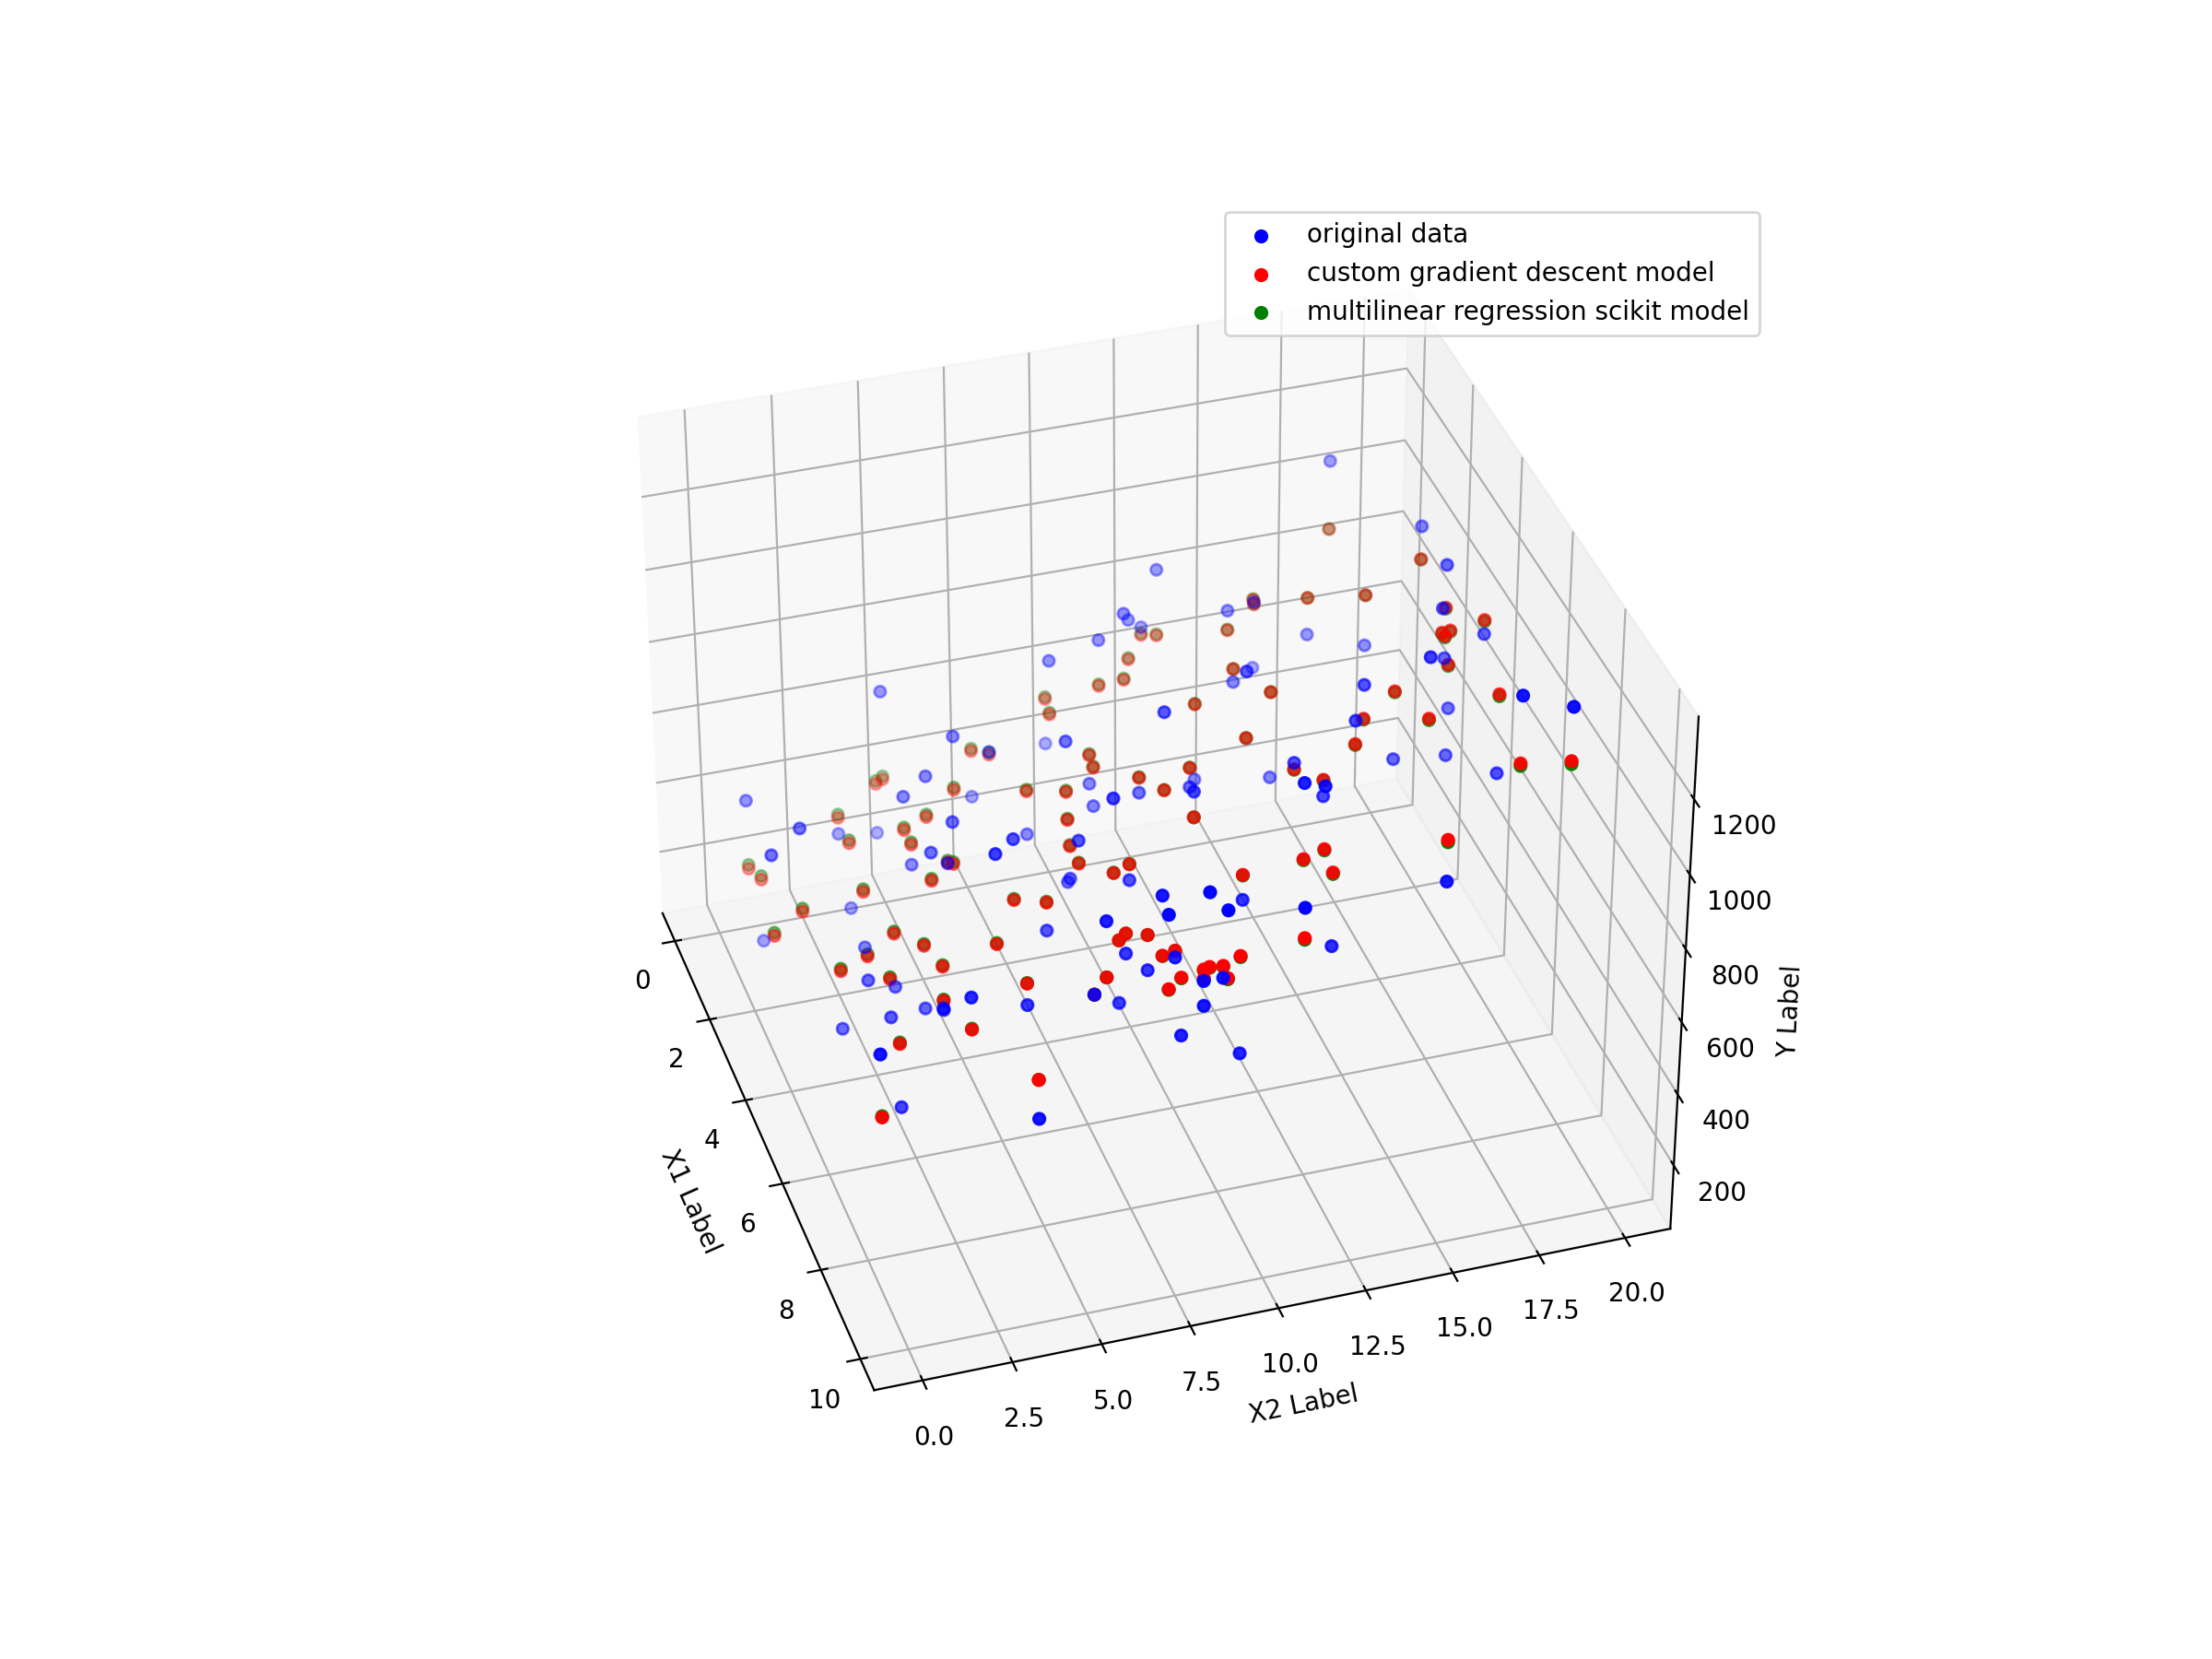

In [39]:
# Making predictions based on x1 and x2 values.
y_pred = m1 * x1 + m2 * x2 + m3

# Model values.
print(f'grad descent model:\n{m1} x1 + {m2} x2 + {m3}')
print(f'm1: {m1}\tm2: {m2}\tc: {m3}\n')

print(f'scikit learn model:\n{model.coef_[0]} x1 + {model.coef_[1]} x2 + {model.intercept_}')
print(f'm1: {model.coef_[0]}\tm2: {model.coef_[1]}\tc: {model.intercept_}\n')

# Plot the chart of x1 x2 overlayed with the numpy model, and the gradient descent model.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, label="original data", color="blue")
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
ax.scatter(x1, x2, y_pred, label="custom gradient descent model", color="red")
ax.scatter(x1, x2, y_pred_scikit, label="multilinear regression scikit model", color="green")
ax.legend()